# Check (That Tweet) Yo Self 
## Prioritizing Tweets to Fact Check
###### Part 8: Cluster Visualizations

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import warnings
import regex as re
import seaborn as sns
import re
import statistics

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings('ignore')
np.random.seed(824)
from bs4 import BeautifulSoup 

# Import stopwords.
from nltk.corpus import stopwords # Import the stopword list
import nltk

from tweetscrape.users_scrape import TweetScrapperUser

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

Load in the data

In [2]:
tweet = pd.read_csv('../data/user_cluster_tweets.csv')

# Relationships we're interested in plotting:

### Features: 
- ratio, retweet_count, followers, 

### Tweet takeaways from each cluster:
- sentiment, len_bio, hashtag_count 

In [3]:
tweet = tweet.rename(columns = {
    'user_group_db' : 'Groups',
    'ratio' : 'Follow Ratio',
    'retweet_count' : '# of Retweets', 
    'user_followers' : '# of Followers',
    'text_sentiment' : 'Tweet Sentiment',
    'hashtag_count' : '# of Hashtags',
    'len_bio' : 'Length of User Bio'
})

In [4]:
tweet.columns

Index(['id', 'time', 'author', 'author_id', 'associated_tweet', 'text',
       'links', 'hashtags', 'mentions', 'reply_count', 'favorite_count',
       '# of Retweets', 'day', 'not_english', '# of Hashtags', 'mention_count',
       'word_count', 'char_count', 'link_count', 'Tweet Sentiment',
       'text_links_removed', 'clean_text', 'clean_word_count',
       'clean_char_count', 'user_tweets', 'user_following', '# of Followers',
       'user_favorites', 'len_user', 'big_feelings', 'Follow Ratio', 'has_url',
       'has_location', 'has_bio', 'Length of User Bio', 'ratio_num_user',
       'emotional_range', 'Groups', 'user_group', 'target'],
      dtype='object')

In [5]:
clusters = tweet.groupby(['Groups']).mean().sort_values(['target'])

In [6]:
clusters

,id,author_id,associated_tweet,reply_count,favorite_count,# of Retweets,not_english,# of Hashtags,mention_count,word_count,...,big_feelings,Follow Ratio,has_url,has_location,has_bio,Length of User Bio,ratio_num_user,emotional_range,user_group,target
Groups,,,,,,,,,,,,,,,,,,,,,
1,1.253942e+18,4.277929e+17,1.253449e+18,0.380268,2.052272,0.273605,0.260551,0.175653,0.145750,25.222745,...,0.262100,1.127193,0.000000,0.000000,0.00000,3.000000,0.139479,0.019135,2.000000,2.706146
2,1.253957e+18,5.748085e+17,1.253366e+18,0.904011,5.859303,1.370809,0.278667,0.402367,0.202498,26.662722,...,0.267239,2.813750,1.000000,1.000000,1.00000,48.174227,0.106509,0.018795,4.000000,8.134122
4,1.253938e+18,5.092492e+17,1.253147e+18,0.587104,7.983032,2.361425,0.271795,0.326923,0.187783,26.228507,...,0.262140,1.995957,0.000000,1.000000,1.00000,87.115385,0.107851,0.019189,4.000000,10.931561
0,1.253943e+18,4.373013e+17,1.252977e+18,0.851322,16.968023,3.998599,0.268508,0.263674,0.147034,25.194177,...,0.263564,1.621993,0.000000,0.000000,1.00000,86.773359,0.092090,0.019169,0.000000,21.817944
3,1.253964e+18,2.590995e+17,1.253206e+18,1.709344,23.609235,5.484609,0.284257,0.422501,0.177200,25.865568,...,0.267071,11.895564,1.000000,0.000000,1.00000,105.836012,0.033074,0.019445,1.000000,30.803187
-1,1.253928e+18,2.153111e+17,1.253079e+18,6.722018,114.163952,27.337888,0.291443,0.291645,0.177614,25.036784,...,0.276124,723.734861,0.459275,0.304256,0.58907,71.158697,0.090221,0.018640,3.658434,148.223857


In [7]:
clusters.index

Int64Index([1, 2, 4, 0, 3, -1], dtype='int64', name='Groups')

In [8]:
clusters = clusters.rename(index={
    1 : '5th priority (1)',
    2 : '4th priority (2)',
    4 : '3rd priority (4)',
    0 : '2nd priority (0)',
    3 : '1st priority (3)',
    -1 : 'outliers (-1)'
})

In [9]:
ss = StandardScaler()
scaled_features = ss.fit_transform(clusters.values)
scaled_clusters = pd.DataFrame(scaled_features, index=clusters.index, columns=clusters.columns)

In [10]:

cluster_profiles = scaled_clusters[['Follow Ratio', '# of Retweets', '# of Followers']]
cluster_tweets = scaled_clusters[['Tweet Sentiment', 'Length of User Bio', '# of Hashtags']]
 

Text(0.5, 0, ' Scaled Average')

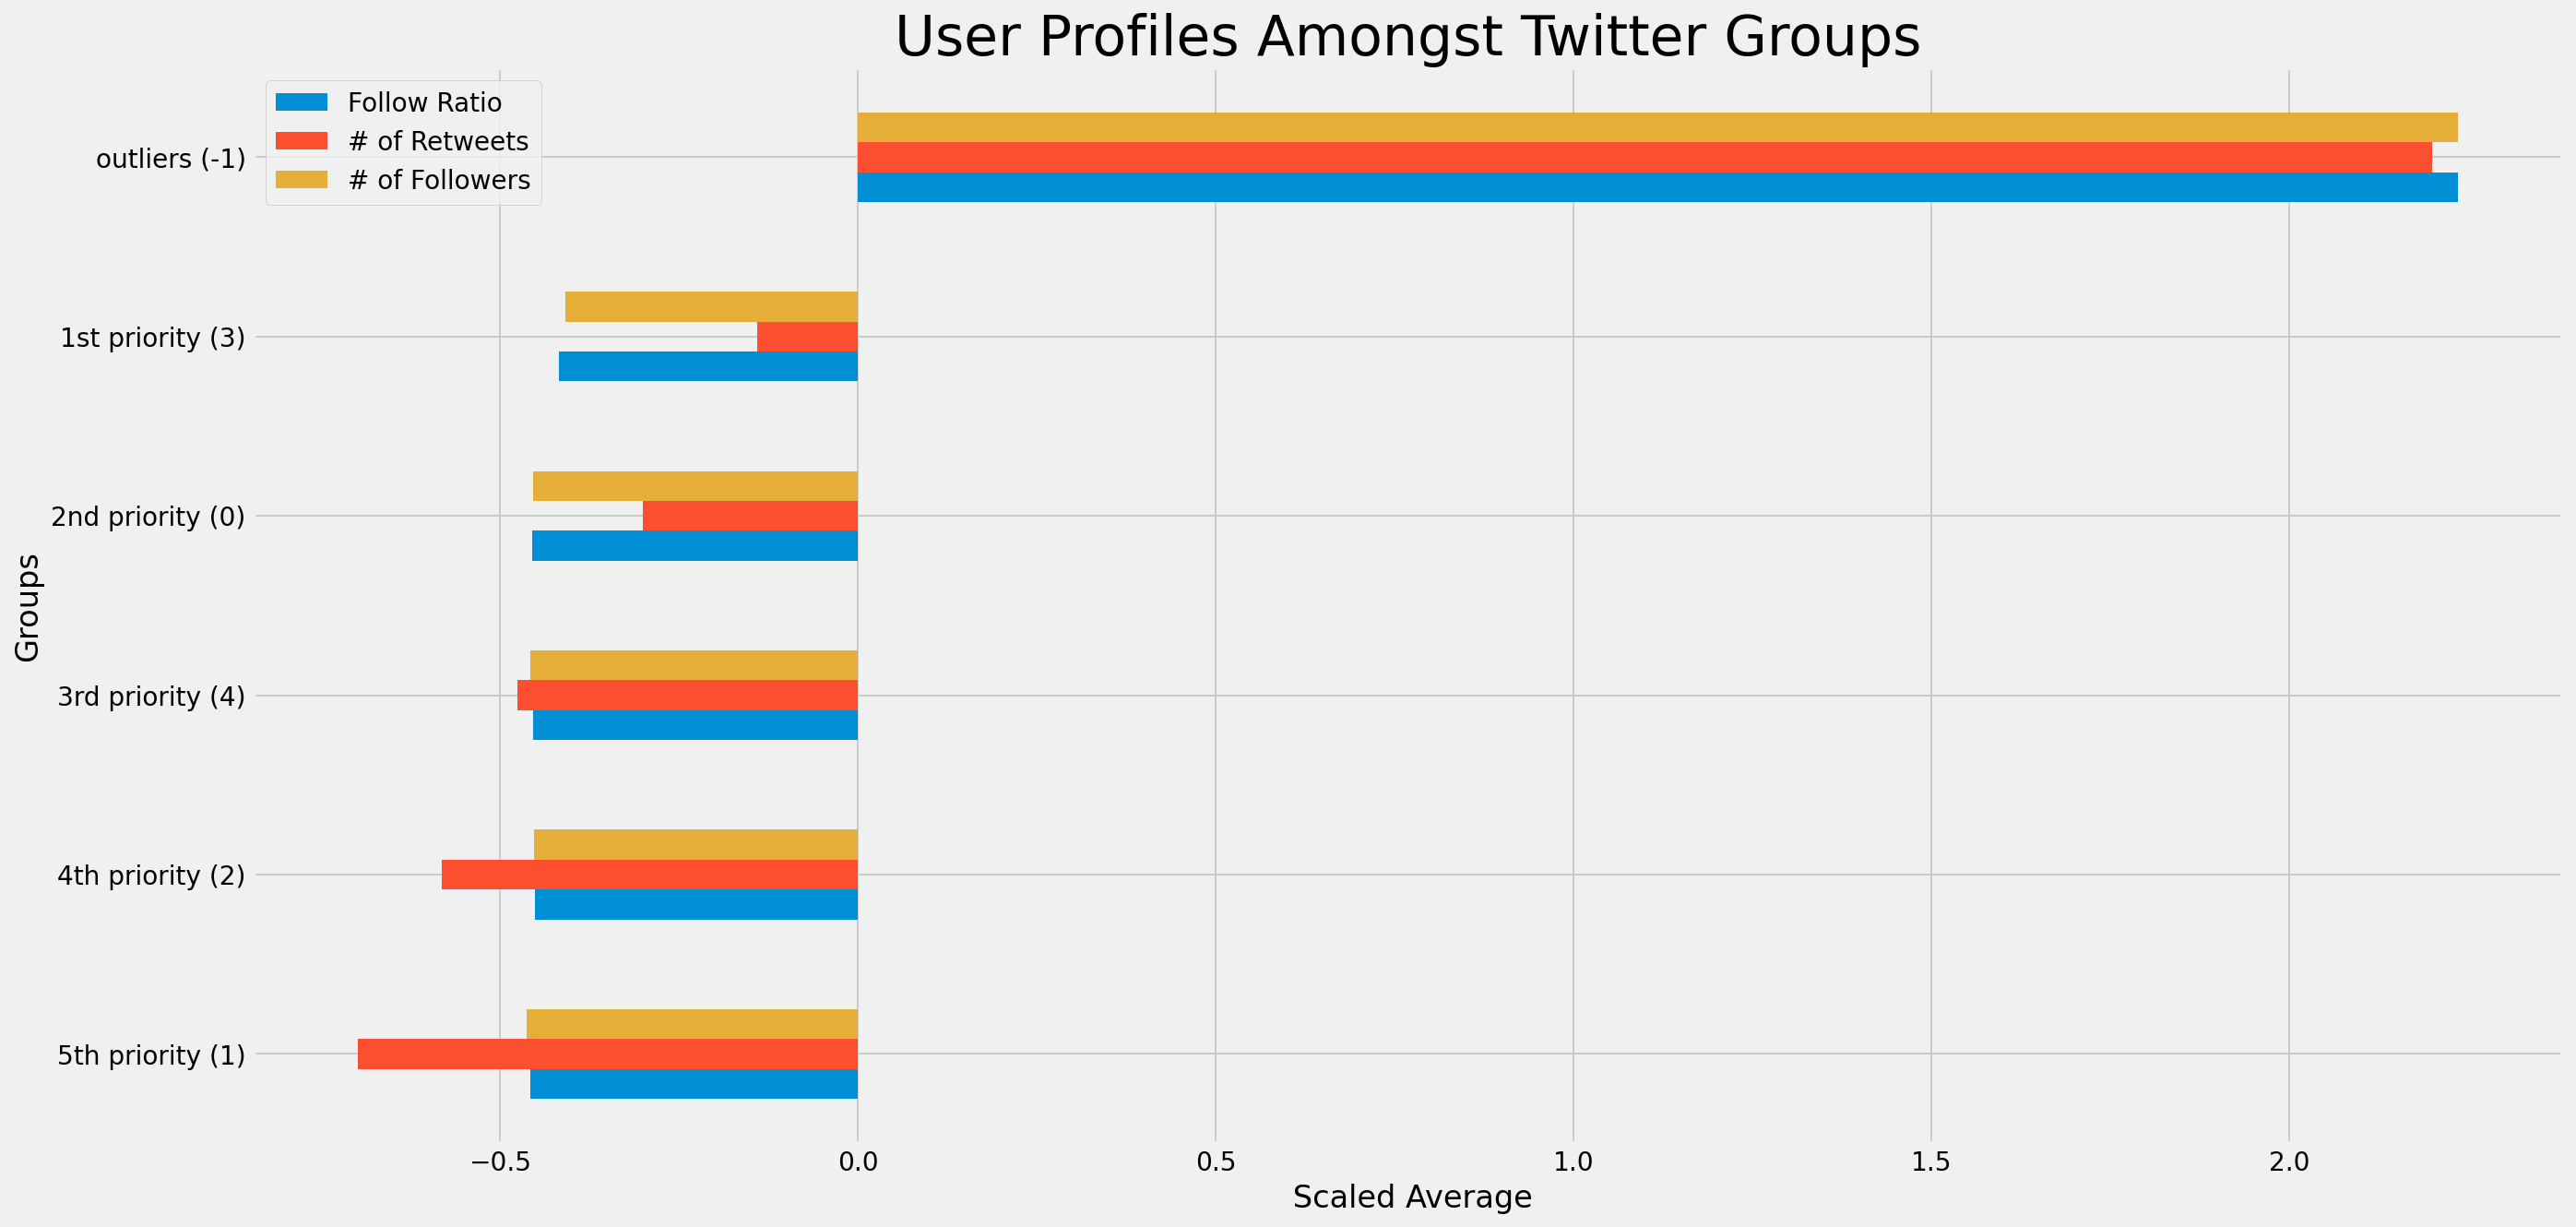

In [11]:
cluster_profiles.plot(kind = 'barh', figsize = (20,10))
plt.title('User Profiles Amongst Twitter Groups', fontsize = 30)
plt.xlabel(' Scaled Average')
#plt.savefig('../assets/profiles', bbox_inches='tight', dpi = 235)

This graph really shows why our outliers were clustered together. They are far above average for follow ratio, # of retweets and # of followers.

Text(0.5, 0, 'Scaled Average')

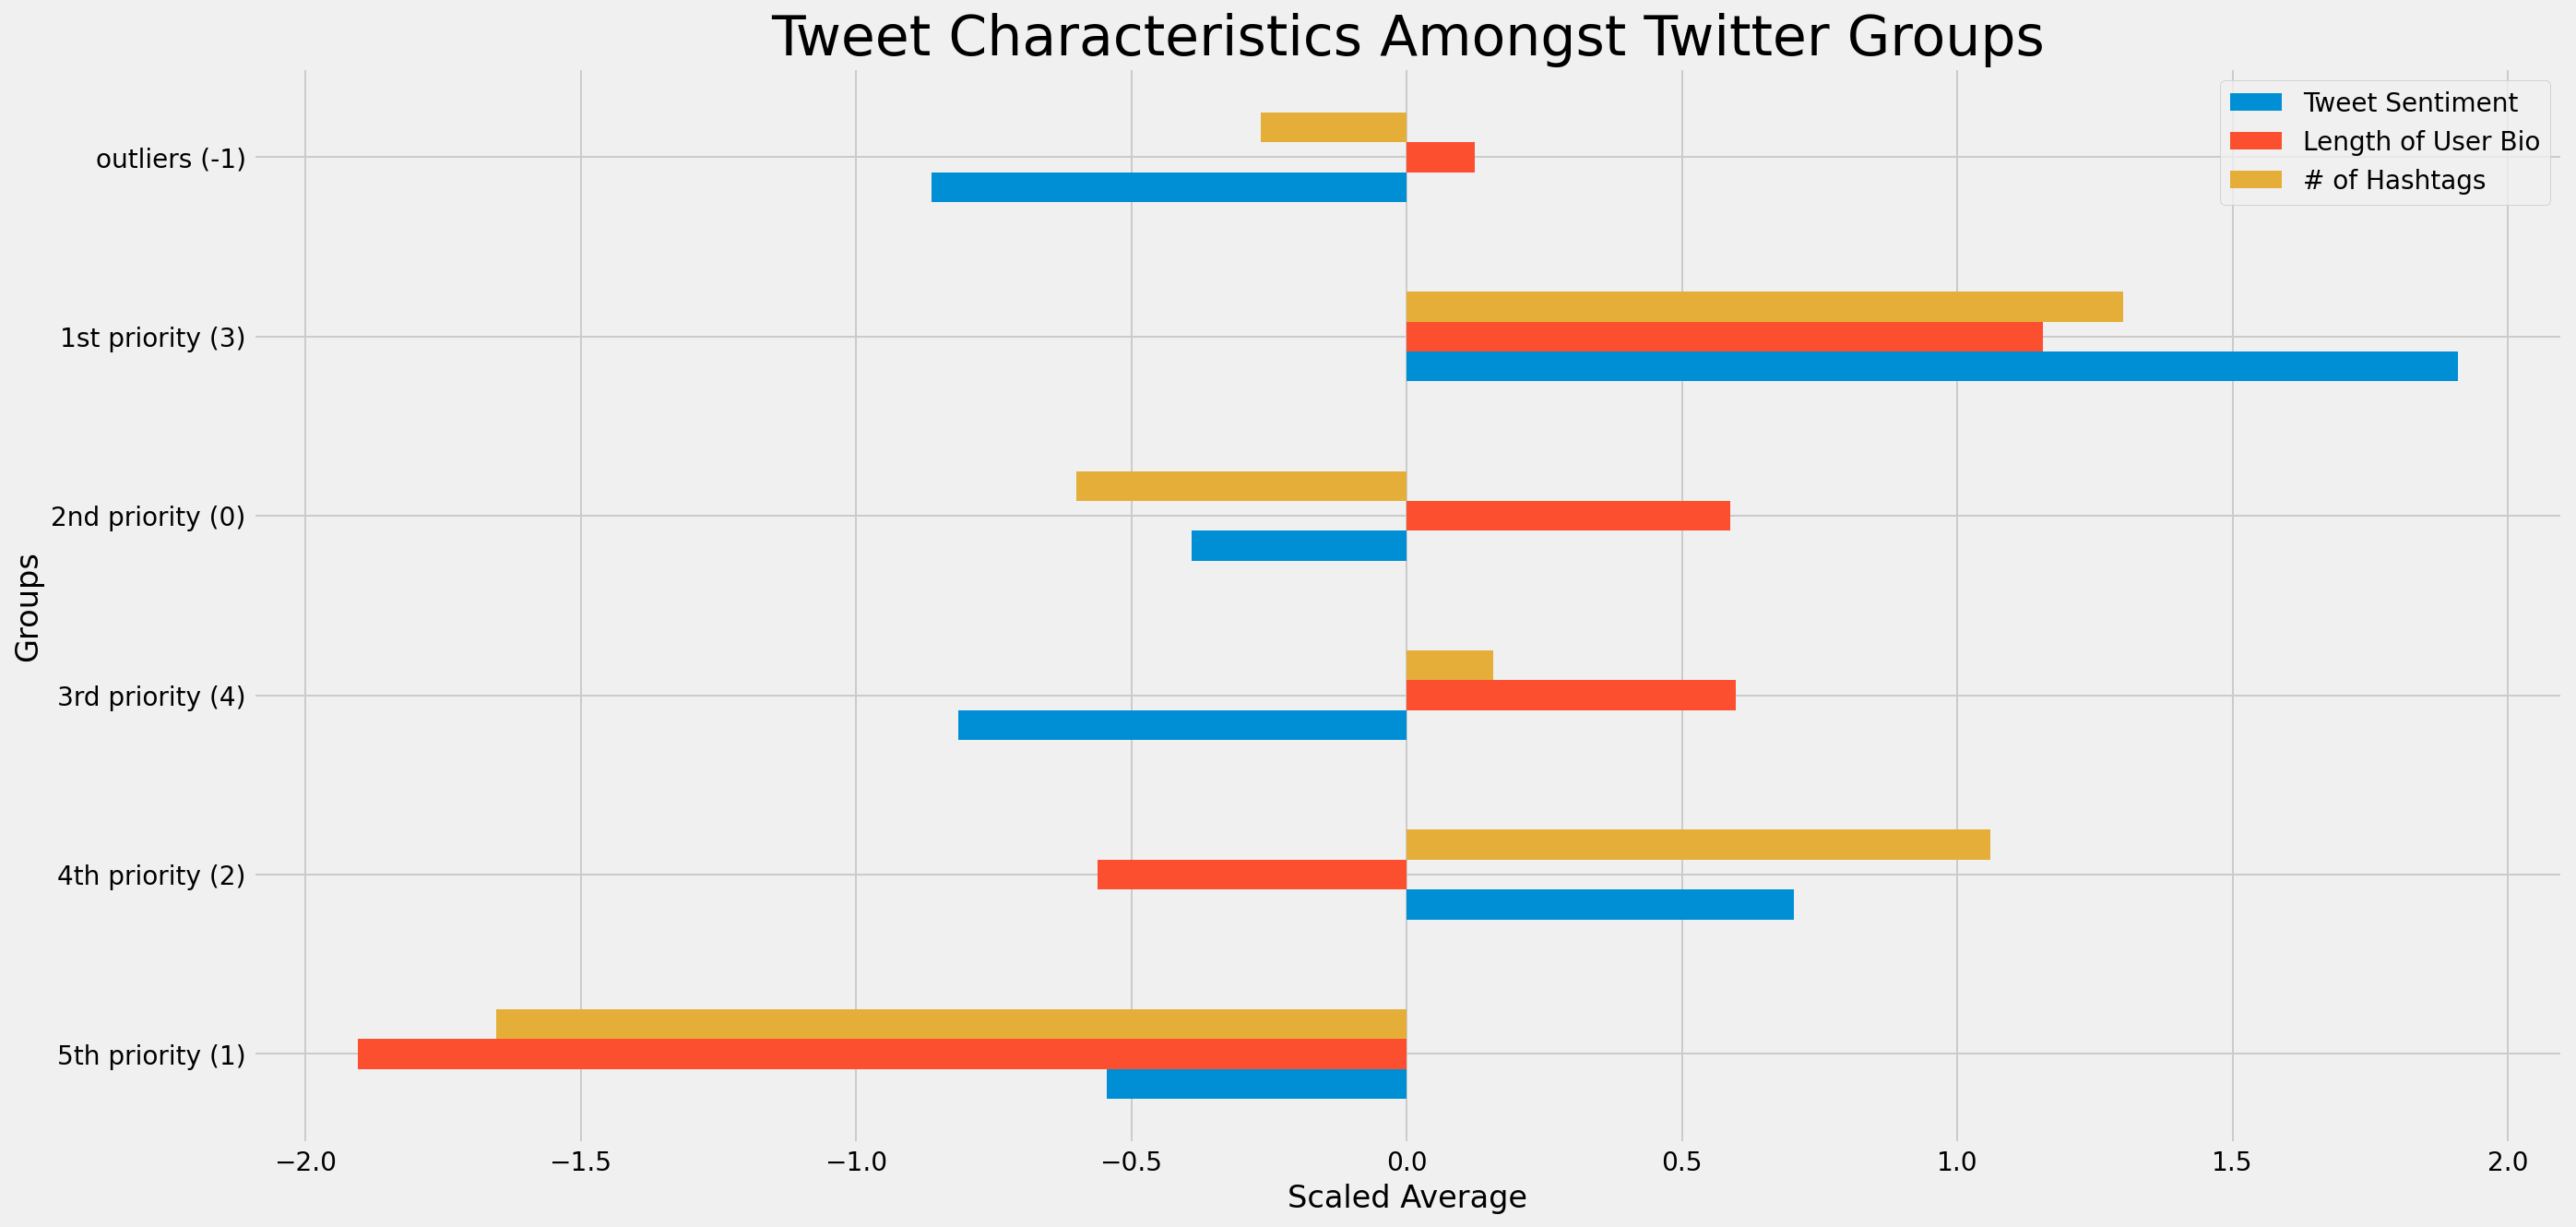

In [12]:
cluster_tweets.plot(kind = 'barh', figsize = (20,10))
plt.title('Tweet Characteristics Amongst Twitter Groups', fontsize = 30)
plt.xlabel('Scaled Average')
#plt.savefig('../assets/tweet_info', bbox_inches='tight', dpi = 235)

This graph shows how our clusters difffer from each other for average sentiment, length of bio, and number of hashtags.